# Introduction to Supervised Learning - Class 5

## Linear Regression: From a simple model to a multivariate regression

### Agenda
1. Introduction to Supervised Learning
2. Simple Linear Regression
    - Understand the linear equation 
    - Fit a simple linear regression 
    - Interpret the regression model coefficients
    - Evaluate the regression model: MSE and $R^2$
    - Fitting process: Gradient descendent and OLS
3. Multiple Linear Regression
    - Fit a multiple linear regression
    - Interpret the regression model coefficients
    - Evaluate the regression model: MSE and $R^2$
4. Example of use case
    - Dataset Loading
    - Exploratory Data Analysis
    - Processing the features
    - Fitting the linear regression
    - Interpret the coefficients
    - Evaluate the model

## 0. Import Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

np.random.seed(0)

## 1. Example of supervised learning with regression

### Example: Patient Age Prediction (Regression) with Specific Biomarker

Generating synthetic data

In [3]:
# Feature: Serum Creatinine Level (mg/dL)
X = 1.5 * np.random.randn(100, 1) + 1.0

# Target: Age
y = 10 * X + np.random.randn(100, 1) * 5 + 40

# Ensure non-negative values (optional)
X = np.abs(X)
y = np.abs(y)

Regression Model and Visualization

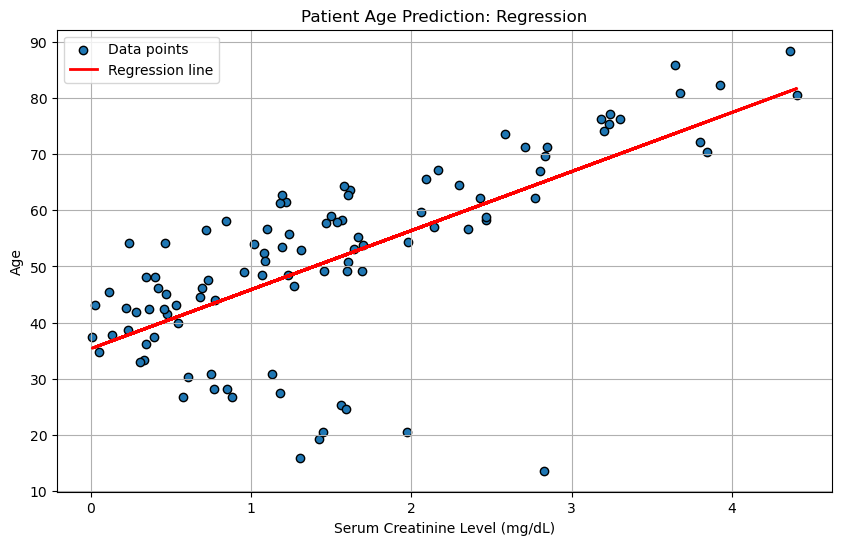

In [4]:
# Linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', edgecolor='k')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Patient Age Prediction: Regression')
plt.xlabel('Serum Creatinine Level (mg/dL)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

## 2. Simple Linear Regression

Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. In simple linear regression, we have one dependent variable and one independent variable.

In simple linear regression, we model the relationship between two variables by fitting a linear equation to observed data. The equation of a simple linear regression line is:

$$
y = \beta_0 + \beta_1 * x
$$

where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $\beta_0$ is the intercept (bias).
- $\beta_1$ is the slope.

### 2.1. Linear Equation: What is the impact of the coefficients ($\beta_0$ and $\beta_1$) in the curve?

In [5]:
# auxiliar function to plot a linear regression curve
def plot_regression(intercept, coefficient):
    origin = (0, 0)

    # Set the x-axis and y-axis limits
    plt.xlim((-5, 5))
    plt.ylim((-10, 10))

    # Plot linear model for specified intercept and coefficient
    x = np.arange(-15, 15)
    y = intercept + coefficient * x
    plt.plot(x, y, label=f'Intercept={intercept}, Coefficient={coefficient}')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

Line passing through origin:

$\beta_0$ = 0

$\beta_1$ = 1

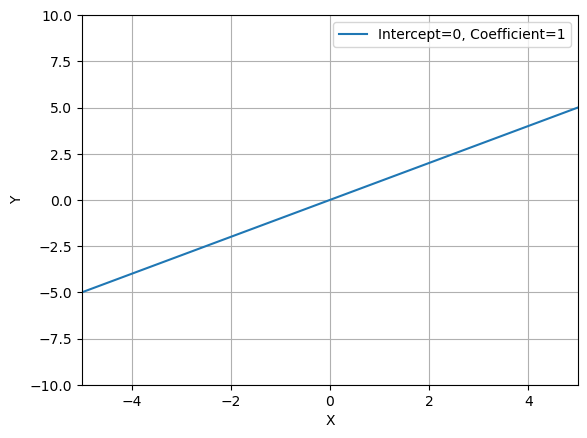

In [6]:
plot_regression(0, 1)

Changing the Slope ($\beta_1$):

$\beta_1$ = -2

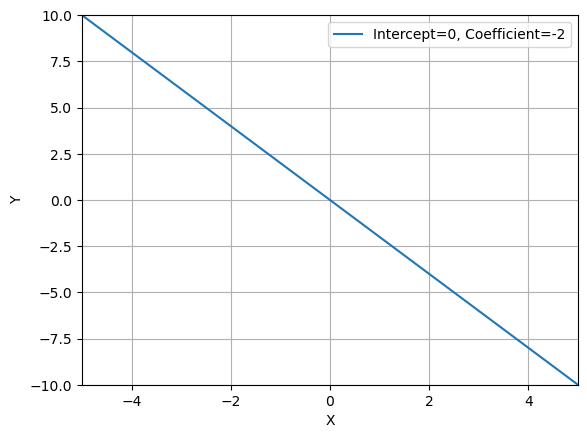

In [7]:
plot_regression(0, -2)

Changing the intercept ($\beta_0$):

$\beta_0$ = -5

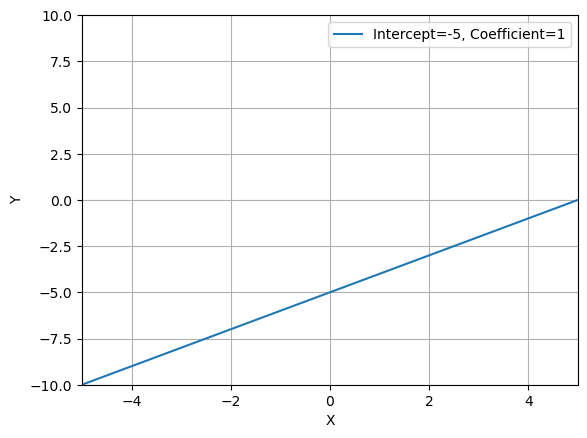

In [8]:
plot_regression(-5, 1)

### 2.2. Fitting a simple Linear Regression

Generate a synthetic dataset for blood pressure prediction

In [9]:
age = np.random.randint(20, 80, size=100)  # Age between 20 and 80
blood_pressure = 120 + 0.5 * age + np.random.randn(100) * 5  # BP with some noise

# Convert to pandas DataFrame
data = pd.DataFrame({'Age': age, 'BloodPressure': blood_pressure})

Plot the data points

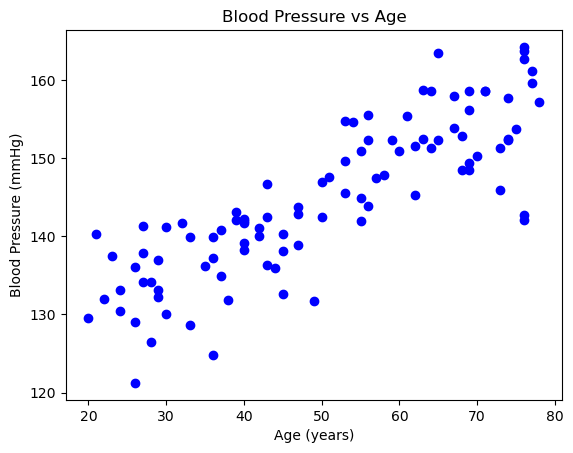

In [10]:
# Plot the data
plt.scatter(data['Age'], data['BloodPressure'], color='blue')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs Age')
plt.show()

Fit the Simple Linear Regression using sklearn package
- LinearRegression()
- fit()

In [11]:
# Prepare the data for modeling
X = data[['Age']].values  # Independent variable
y = data['BloodPressure'].values  # Dependent variable

# Fit a simple linear regression model
model = LinearRegression()
model.fit(data[['Age']], data['BloodPressure'])

y_predict = model.predict(data[['Age']])

Plot the data points and the regression line

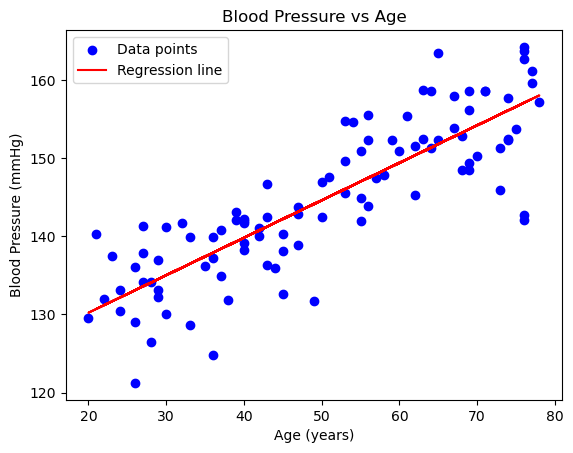

In [12]:
# Plot the data points
plt.scatter(data['Age'], data['BloodPressure'], color='blue', label='Data points')

# Plot the regression line
plt.plot(data['Age'], y_predict, color='red', label='Regression line')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs Age')
plt.legend()
plt.show()

### 2.3. Model coefficients interpretation

sklearn also offers some functions for interpret the coefficients of the regression model
- model.coef_[0] for the slope of the regression line
- model.intercept_ for retrive the intercept of the model

In [13]:
# Get the coefficients
beta_1 = model.coef_[0]
beta_0 = model.intercept_

In [14]:
print(f"The linear regression equation is: y = {beta_0:.2f} + {beta_1:.2f} * Age")

The linear regression equation is: y = 120.62 + 0.48 * Age


In [15]:
# Now, use statsmodels to get detailed summary including p-values
# Statsmodel is a package for estimating different statistical models
X_statsmodels = sm.add_constant(X)  # Add constant for intercept
model_statsmodels = sm.OLS(y, X_statsmodels)
results_statsmodels = model_statsmodels.fit()
p_values = results_statsmodels.pvalues

In [16]:
# Print coefficients and p-values together
print(f"Intercept (beta_0): {beta_0:.2f} (p-value: {p_values[0]:.4f})")
print(f"Slope (beta_1): {beta_1:.2f} (p-value: {p_values[1]:.4f})")

Intercept (beta_0): 120.62 (p-value: 0.0000)
Slope (beta_1): 0.48 (p-value: 0.0000)


### 2.4. How good is the model?

#### Mean Squared Error (MSE)
The mean squared error (MSE) is a measure of the average squared difference between the actual and predicted values in a regression model. It is calculated as the average of the squared residuals.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
Where:
- $n$ is the number of samples.
- $y_i$ is the actual value of the dependent variable for sample $i$.
- $\hat{y}_i$ is the predicted value of the dependent variable for sample $i$.

In [17]:
mse = mean_squared_error(y, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 28.149179986089553


#### Coefficient of Determination ($R^2$)
The coefficient of determination, often denoted as $R^2$, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). 

It ranges from 0 to 1 and indicates the goodness of fit of the regression model.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
Where:
- $n$ is the number of samples.
- $y_i$ is the actual value of the dependent variable for sample $i$.
- $\hat{y}_i$ is the predicted value of the dependent variable for sample $i$.
- $\bar{y}$ is the mean of the actual values of the dependent variable.

In [18]:
r2 = r2_score(y, y_predict)
print(f"R^2 Score: {r2}")

R^2 Score: 0.7065280869127863


#### Residuals Plot

Residuals are the differences between the observed values (actual data points) and the values predicted by the regression model. 

This plot helps to evaluate the goodness of fit of the regression model and diagnose potential issues.

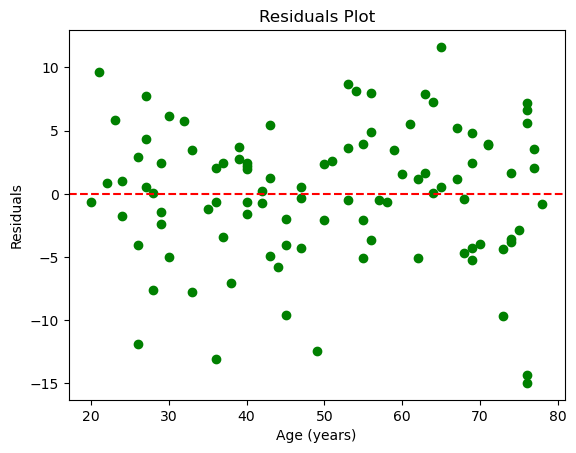

In [19]:
# Plot the residuals
residuals = data['BloodPressure'] - y_predict
plt.scatter(data['Age'], residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Age (years)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

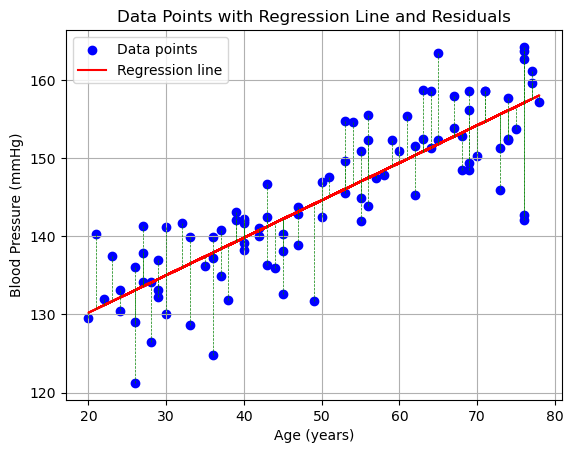

In [20]:
# Plot data points and regression line
plt.scatter(data['Age'], y, label='Data points', color='blue')
plt.plot(data['Age'], y_predict, color='red', label='Regression line')

# Plot distances between points and regression line
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_predict[i]], color='green', linestyle='--', linewidth=0.5)

plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Data Points with Regression Line and Residuals')
plt.legend()
plt.grid(True)
plt.show()

### 2.5 How is the fitting process happening?

#### Minimizing the Sum of Squared Residuals

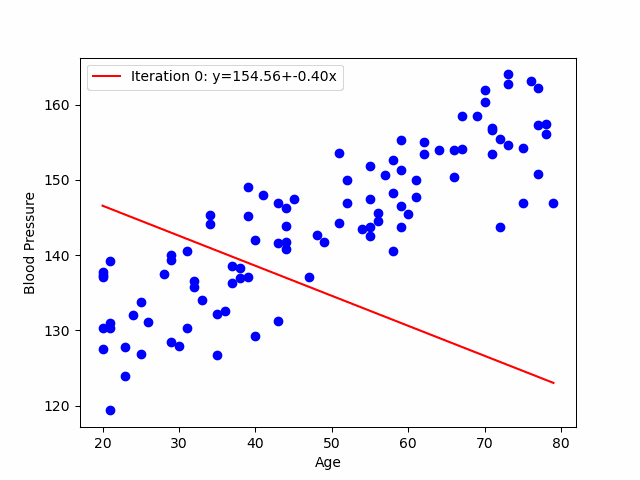

In [21]:
# we will probably not be able to visualize this gif directly in the colab --> you can acess tha in 'Aula 5 - Supervised Learning I/gradient_descendent_example.gif'ArithmeticError
display(Image(filename="gradient_descendent_example.gif"))

#### Analytic solution: Ordinary Least Squares

The Ordinary Least Squares (OLS) method provides a closed-form solution to find the optimal values of $\beta_0$ and $\beta_1$. The formulas for these coefficients are:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

where:
- $\bar{x}$ is the mean of the independent variable $x$.
- $\bar{y}$ is the mean of the dependent variable $y$.

In [22]:
# Function to compute predictions
def linear_regression(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

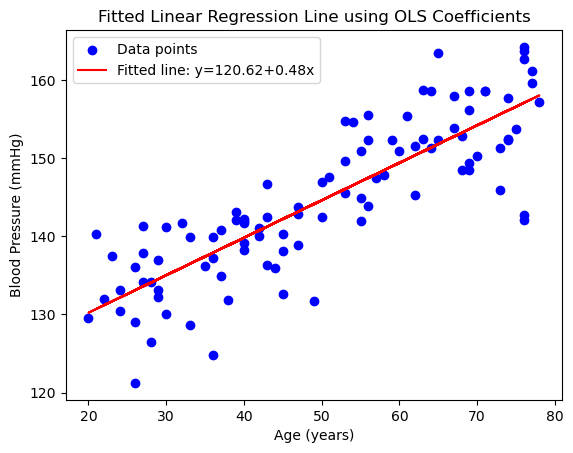

In [23]:
# Calculate means
x_mean = np.mean(data['Age'])
y_mean = np.mean(data['BloodPressure'])

# Calculate coefficients using OLS formulas
beta_1 = np.sum((data['Age'] - x_mean) * (data['BloodPressure'] - y_mean)) / np.sum((data['Age'] - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

y_pred = linear_regression(data['Age'], beta_0, beta_1)

# Plot initial data points and initial regression line with OLS coefficients
plt.scatter(data['Age'], data['BloodPressure'], color='blue', label='Data points')
plt.plot(data['Age'], y_pred, color='red', label=f'Fitted line: y={beta_0:.2f}+{beta_1:.2f}x')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Fitted Linear Regression Line using OLS Coefficients')
plt.legend()
plt.show()

## 3. Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression. It models the relationship between a dependent variable and two or more independent variables. 

The equation of a multiple linear regression line is:

$$
y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_n * x_n
$$

where:
- $y$ is the dependent variable.
- $x_1$, $x_2$, $x_n$ is the independent variable.
- $\beta_0$ is the intercept (bias).
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients (slopes) corresponding to each independent variable.

### 3.1 Fitting a regression model and interpret the coefficients

Generate a synthetic dataset

In [24]:
# Generate synthetic data
age = np.random.randint(20, 80, size=100)  # Age between 20 and 80
weight = np.random.randint(50, 100, size=100)  # Weight between 50 and 100 kg
height = np.random.randint(150, 200, size=100)  # Height between 150 and 200 cm
blood_pressure = 120 + 0.5 * age + 0.2 * weight - 0.1 * height + np.random.randn(100) * 5  # BP with some noise

In [25]:
# Create a DataFrame
dataset = pd.DataFrame({'Age': age, 'Weight': weight, 'Height': height, 'BloodPressure': blood_pressure})

Visualize the dataframe

In [26]:
dataset.head()

,Age,Weight,Height,BloodPressure
0,23,86,182,123.274911
1,30,76,198,140.152845
2,70,54,166,140.503375
3,77,91,182,164.045765
4,47,60,160,145.830436


Plot each independent variable versus the dependent variable

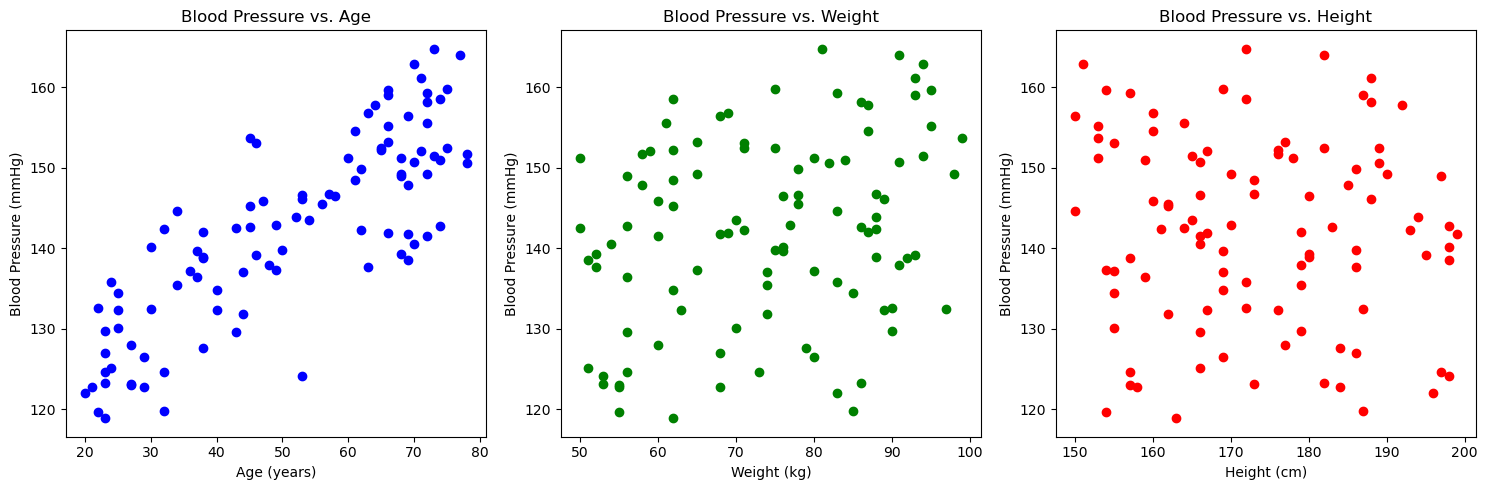

In [27]:
# Plot Age vs Blood Pressure
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dataset['Age'], dataset['BloodPressure'], color='blue')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Age')

# Plot Weight vs Blood Pressure
plt.subplot(1, 3, 2)
plt.scatter(dataset['Weight'], dataset['BloodPressure'], color='green')
plt.xlabel('Weight (kg)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Weight')

# Plot Height vs Blood Pressure
plt.subplot(1, 3, 3)
plt.scatter(dataset['Height'], dataset['BloodPressure'], color='red')
plt.xlabel('Height (cm)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Height')

plt.tight_layout()
plt.show()

Fit the multiple linear regrssion model

In [28]:
# Prepare the data for modeling
X = dataset[['Age', 'Weight', 'Height']]  # Independent variables
y = dataset['BloodPressure']  # Dependent variable

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Interpret the model coefficients

In [29]:
# Get the coefficients
beta_0 = model.intercept_
coefficients = model.coef_
beta_1 = coefficients[0]
beta_2 = coefficients[1]
beta_3 = coefficients[2]

In [30]:
# Now, use statsmodels to get detailed summary including p-values
# Statsmodel is a package for estimating different statistical models
X_statsmodels = sm.add_constant(X)  # Add constant for intercept
model_statsmodels = sm.OLS(y, X_statsmodels)
results_statsmodels = model_statsmodels.fit()
p_values = results_statsmodels.pvalues

In [31]:
p_values

const     1.932929e-30
Age       1.487926e-33
Weight    1.646667e-09
Height    1.659274e-04
dtype: float64

In [32]:
# Print coefficients and p-values together
print(f"Intercept (beta_0): {beta_0:.2f} (p-value: {p_values.iloc[0]:.4f})")
print(f"Slope (beta_1): {beta_1:.2f} (p-value: {p_values.iloc[1]:.4f})")
print(f"Slope (beta_2): {beta_2:.2f} (p-value: {p_values.iloc[2]:.4f})")
print(f"Slope (beta_3): {beta_3:.2f} (p-value: {p_values.iloc[3]:.4f})")

Intercept (beta_0): 122.04 (p-value: 0.0000)
Slope (beta_1): 0.54 (p-value: 0.0000)
Slope (beta_2): 0.25 (p-value: 0.0000)
Slope (beta_3): -0.15 (p-value: 0.0002)


In [33]:
# Optionally, print the prediction equation
print(f"The linear regression equation is: y = {beta_0:.2f} + {beta_1:.2f} * Age + {beta_2:.2f} * Weight + {beta_3:.2f} * Height")

The linear regression equation is: y = 122.04 + 0.54 * Age + 0.25 * Weight + -0.15 * Height


To visualize the multiple linear regression equation, you can plot the predicted blood pressure against each individual independent variable while keeping the other variables at their mean values. 

This will show the relationship between each independent variable and the dependent variable, given that the other variables are held constant.

In [34]:
# Means of the independent variables
mean_age = np.mean(dataset['Age'])
mean_weight = np.mean(dataset['Weight'])
mean_height = np.mean(dataset['Height'])

# Linear regression coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]
beta_3 = model.coef_[2]

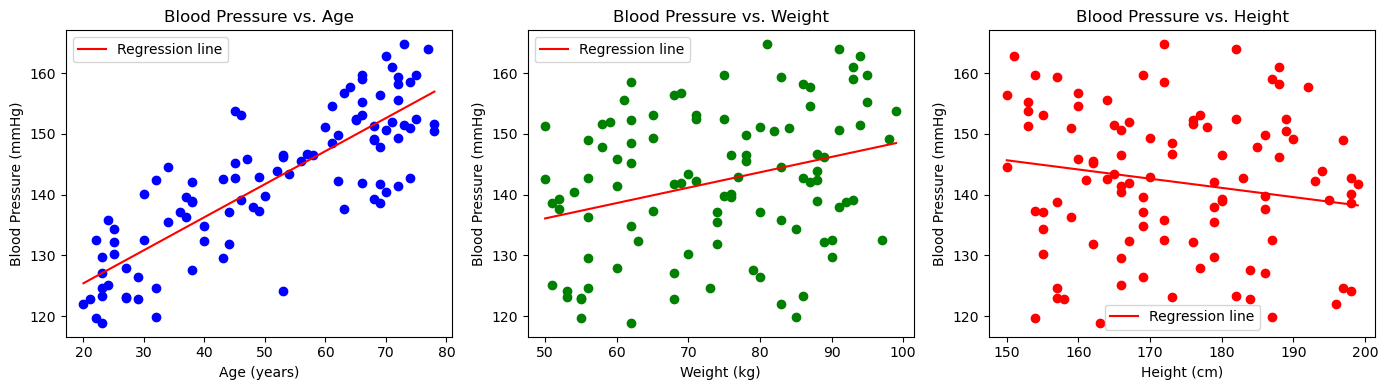

In [35]:
# Function to compute predicted blood pressure
def predict_bp(age, weight, height, beta_0, beta_1, beta_2, beta_3):
    return beta_0 + beta_1 * age + beta_2 * weight + beta_3 * height

# Plot Blood Pressure vs. Age (keeping Weight and Height constant at their mean values)
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
age_range = np.linspace(age.min(), age.max(), 100)
bp_pred_age = predict_bp(age_range, mean_weight, mean_height, beta_0, beta_1, beta_2, beta_3)
plt.scatter(dataset['Age'], dataset['BloodPressure'], color='blue')
plt.plot(age_range, bp_pred_age, color='red', label='Regression line')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Age')
plt.legend()

# Plot Blood Pressure vs. Weight (keeping Age and Height constant at their mean values)
plt.subplot(1, 3, 2)
weight_range = np.linspace(weight.min(), weight.max(), 100)
bp_pred_weight = predict_bp(mean_age, weight_range, mean_height, beta_0, beta_1, beta_2, beta_3)
plt.scatter(dataset['Weight'], dataset['BloodPressure'], color='green')
plt.plot(weight_range, bp_pred_weight, color='red', label='Regression line')
plt.xlabel('Weight (kg)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Weight')
plt.legend()

# Plot Blood Pressure vs. Height (keeping Age and Weight constant at their mean values)
plt.subplot(1, 3, 3)
height_range = np.linspace(height.min(), height.max(), 100)
bp_pred_height = predict_bp(mean_age, mean_weight, height_range, beta_0, beta_1, beta_2, beta_3)
plt.scatter(dataset['Height'], dataset['BloodPressure'], color='red')
plt.plot(height_range, bp_pred_height, color='red', label='Regression line')
plt.xlabel('Height (cm)')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs. Height')
plt.legend()

plt.tight_layout()
plt.show()

### 3.2. How goo is the linear regression model?

In [36]:
y_predict = model.predict(X)

In [37]:
mse = mean_squared_error(y, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 27.00383207665295


In [38]:
r2 = r2_score(y, y_predict)
print(f"R^2 Score: {r2}")

R^2 Score: 0.8025150645120616


## 4. Example of an use-case: Diabetes dataset

#### Using a Diabetes dataset from sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:
- Number of Instances: 442
- Number of Attributes: First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- age in years
- sex
- bmi, body mass index
- bp, average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

In [39]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

#### Load the dataset

In [40]:
# Load the diabetes dataset from sklearn
diabetes = load_diabetes(scaled=False)

# Create a pandas DataFrame for easier manipulation
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add the target column (dependent variable)

#### Some descriptive analyses

In [41]:
# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [42]:
# Display the last few rows of the dataframe
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0
441,36.0,1.0,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0,57.0


In [43]:
# Summary statistics of the dataframe
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [44]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


#### Linear Regression Fitting

In [45]:
# Define X and y 
X = df.drop('target', axis=1)  # Independent variables
y = df['target']  # Dependent variable (target)

**Note:** It is important to normalize/standardize the features (independent variables) before fitting a model for:
- Scale consistency
- Algorithm sensitivity
- Interpretability

In this case we choosed bu using 'StandardScaler()' function from sklearn, which scale features so that they have a mean of 0 and a standard deviation of 1.

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Fit the Linear regression
model_LR = LinearRegression()
model_LR.fit(X_scaled, y)

LinearRegression()

#### Interpreting the coefficients of the linear regression

In [48]:
# Model coefficients interpretation 
coefficients = model_LR.coef_
intercept = model_LR.intercept_

In [49]:
# Now, use statsmodels to get detailed summary including p-values
# Statsmodel is a package for estimating different statistical models
X_statsmodels = sm.add_constant(X_scaled)  # Add constant for intercept
model_statsmodels = sm.OLS(y, X_statsmodels)
results_statsmodels = model_statsmodels.fit()
p_values = results_statsmodels.pvalues

In [50]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'p-value': np.array(p_values.iloc[1:]).round(4)
})

In [51]:
coefficients_df

,Feature,Coefficient,p-value
0,age,-0.476121,0.8670
1,sex,-11.406867,0.0001
2,bmi,24.726549,0.0000
3,bp,15.429404,0.0000
4,s1,-37.679953,0.0579
5,s2,22.676163,0.1604
6,s3,4.806138,0.6347
7,s4,8.422039,0.2735
8,s5,35.734446,0.0000
9,s6,3.216674,0.3060


In [52]:
print('Intercept: {}'.format(intercept), '(p-value: ', p_values.loc['const'], ')')

Intercept: 152.13348416289597 (p-value:  1.0100819291678948e-208 )


#### Evaluate the model predictions

In [53]:
# Predict on the test set
y_predict = model_LR.predict(X_scaled)

In [54]:
# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 2859.70


In [55]:
# Compute R-squared (R2) score
r2 = r2_score(y, y_predict)
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.52
